# Import libraries and data

In [111]:
#Importing some libraries to start with
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
#reading initial csv
test = pd.read_csv("/Users/liyutenaw/Downloads/Data Mining/test.csv")
train = pd.read_csv("/Users/liyutenaw/Downloads/Data Mining/train.csv")

# Data Understanding

In [113]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [114]:
#Split the training data and test within that because the test dataset provides does not contain price values
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [115]:
train.shape

(1460, 81)

In [116]:
train.head

<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Util

# Pre-Processing

In [117]:
#checking nulls
train.isna().sum()[train.isna().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [118]:
#drop features with many nulls
#Considering 400 nulls as many nulls
train.drop(columns = train.isna().sum()[train.isna().sum() > 400].index, axis = 1, inplace = True)

In [119]:
#check if the columns with many nulls are dropped
train.head

<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1455  1456          60       RL         62.0     7917   Pave      Reg   
1456  1457          20       RL         85.0    13175   Pave      Reg   
1457  1458          70       RL         66.0     9042   Pave      Reg   
1458  1459          20       RL         68.0     9717   Pave      Reg   
1459  1460          20       RL         75.0     9937   Pave      Reg   

     LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0           

In [120]:
train.shape

(1460, 76)

In [121]:
#find columns that are Categorical
categorical_cols = list(train.nunique()[train.nunique() < len(train) / 5].index)

In [122]:
len(categorical_cols)

65

In [123]:
#only categorical 
categorical = train.filter(items=categorical_cols)
#only continuous 
continuous = train.filter(items=list(set(train.columns) - set(categorical_cols)))
#replace any nulls with 0
continuous.fillna(value = 0, inplace = True)

In [124]:
continuous.isna().any()

Id             False
GarageArea     False
SalePrice      False
TotalBsmtSF    False
BsmtUnfSF      False
GrLivArea      False
1stFlrSF       False
2ndFlrSF       False
BsmtFinSF1     False
LotArea        False
MasVnrArea     False
dtype: bool

In [125]:
#checking nulls again
continuous.isna().sum()[continuous.isna().sum() > 0]

Series([], dtype: int64)

# Experiment 1

In [126]:
##Test for continuous values only

In [127]:
#import sklearn dependencies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [128]:
#Separate data into independents/dependent variables
X = continuous.drop('SalePrice',axis = 1)
y = continuous.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 42)

In [129]:
# Create linear regression object
regr = LinearRegression()

In [130]:
# Fit the linear regression model object to our data
regr.fit(X_train, y_train)

LinearRegression()

In [131]:
#coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [-7.05775292 98.65389637 27.82910158  8.673815   -9.46692191 66.2712329
 72.78413775 19.70521715  0.22334513 42.64579411]
Intercept: 
 507.48265670458204


In [132]:
#to get better view
coefficients = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(np.transpose(regr.coef_))], axis = 1)
coefficients

,0,0
0,Id,-7.057753
1,GarageArea,98.653896
2,TotalBsmtSF,27.829102
3,BsmtUnfSF,8.673815
4,GrLivArea,-9.466922
5,1stFlrSF,66.271233
6,2ndFlrSF,72.784138
7,BsmtFinSF1,19.705217
8,LotArea,0.223345
9,MasVnrArea,42.645794


In [133]:
coe = regr.score(X_train, y_train)
print('Coefficient of Determination for Experiment 1:', coe)

Coefficient of Determination for Experiment 1: 0.6451268073424741


### Evaluate continous Model

In [134]:
yc_pred = regr.predict(X_test)

print('Experiment c Evaluation')
from sklearn import metrics
print('Coefficient of Determination: {:.2f}'.format(coe*100))

mae = metrics.mean_absolute_error(y_test, yc_pred)
print('Mean Absolute Error:', mae)

mse = metrics.mean_squared_error(y_test, yc_pred)
print('Mean Square Error:', mse)

rmse = metrics.mean_squared_error(y_test, yc_pred,squared = False)
print('Root Mean Square Error:', rmse)

Experiment c Evaluation
Coefficient of Determination: 64.51
Mean Absolute Error: 27807.462069748355
Mean Square Error: 1759550074.082855
Root Mean Square Error: 41946.991239931085


In [135]:
##Test including categotical values

In [136]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

train.Neighborhood= le.fit_transform(train.Neighborhood)
train.Condition1= le.fit_transform(train.Condition1)
train.Condition2= le.fit_transform(train.Condition2)
train.Functional= le.fit_transform(train.Functional)
train.MSZoning= le.fit_transform(train.MSZoning)
train.Street= le.fit_transform(train.Street)
train.LotShape= le.fit_transform(train.LotShape)
train.LandContour= le.fit_transform(train.LandContour)
train.Utilities= le.fit_transform(train.Utilities)
train.LotConfig= le.fit_transform(train.LotConfig)
train.LandSlope= le.fit_transform(train.LandSlope)
train.SaleType= le.fit_transform(train.SaleType)
train.SaleCondition= le.fit_transform(train.SaleCondition)
train.BldgType= le.fit_transform(train.BldgType)
train.HouseStyle= le.fit_transform(train.HouseStyle)
train.RoofStyle= le.fit_transform(train.RoofStyle)
train.RoofMatl= le.fit_transform(train.RoofMatl)
train.Exterior1st= le.fit_transform(train.Exterior1st)
train.Exterior2nd= le.fit_transform(train.Exterior2nd)
train.ExterQual= le.fit_transform(train.ExterQual)
train.ExterCond= le.fit_transform(train.ExterCond)
train.Foundation= le.fit_transform(train.Foundation)
train.Heating= le.fit_transform(train.Heating)
train.HeatingQC= le.fit_transform(train.HeatingQC)
train.CentralAir= le.fit_transform(train.CentralAir)
train.KitchenQual= le.fit_transform(train.KitchenQual)
train.PavedDrive= le.fit_transform(train.PavedDrive)
train.dropna(axis=1,inplace = True)

train

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,7917,1,3,3,0,4,0,...,0,0,0,0,0,8,2007,8,4,175000
1456,1457,20,3,13175,1,3,3,0,4,0,...,0,0,0,0,0,2,2010,8,4,210000
1457,1458,70,3,9042,1,3,3,0,4,0,...,0,0,0,0,2500,5,2010,8,4,266500
1458,1459,20,3,9717,1,3,3,0,4,0,...,112,0,0,0,0,4,2010,8,4,142125


In [137]:
X3 = train.drop('SalePrice',axis = 1)
y3 = train.SalePrice

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.4,random_state = 42)

In [138]:
regr3 = LinearRegression()
regr3.fit(X3_train, y3_train)

LinearRegression()

In [139]:
coff = regr3.score(X3_train, y3_train)
print('Coefficient of Determination for Experiment 1:', coff)

Coefficient of Determination for Experiment 1: 0.8371752436481581


In [140]:
print(f'intercept/constant = {regr3.intercept_}')

intercept/constant = 1384212.6265294305


In [141]:
train_coeff = pd.DataFrame(regr3.coef_, X3_test.columns, columns=['Coefficient'])
train_coeff

,Coefficient
Id,-4.153532
MSSubClass,-98.800762
MSZoning,382.465072
LotArea,0.338217
Street,43908.189247
...,...
MiscVal,1.544497
MoSold,-48.943149
YrSold,-975.296127
SaleType,-694.524368


In [142]:
y3_pred = regr3.predict(X3_test)

### Experiment 1 Evaluation: continous+categorical features

In [143]:
##Evaluate Model
print('Experiment 1 Evaluation')
from sklearn import metrics
print('Coefficient of Determination: {:.2f}'.format(coff*100))

mae = metrics.mean_absolute_error(y3_test, y3_pred)
print('Mean Absolute Error:', mae)

mse = metrics.mean_squared_error(y3_test, y3_pred)
print('Mean Square Error:', mse)

rmse = metrics.mean_squared_error(y3_test, y3_pred,squared = False)
print('Root Mean Square Error:', rmse)


Experiment 1 Evaluation
Coefficient of Determination: 83.72
Mean Absolute Error: 23245.00329421788
Mean Square Error: 1421914186.2385466
Root Mean Square Error: 37708.277423379426


### applying pipeline 

In [144]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA

##### SGDRegressor

In [145]:
SGDRegressor_pipe = Pipeline([
    ('StandardScaler', StandardScaler()),
    ('SGDRegressor', SGDRegressor())
]).fit(X3_train, y3_train)

sgd_y_pred = SGDRegressor_pipe.predict(X3_test)

print(f"SGDRegressor MAE: {mean_absolute_error(y3_test, sgd_y_pred):.2f}")
print(f"SGDRegressor MSE: {mean_squared_error(y3_test, sgd_y_pred):.2f}")
print(f"SGDRegressor RMSE: {mean_squared_error(y3_test, sgd_y_pred, squared = False):.2f}")

SGDRegressor MAE: 24389.16
SGDRegressor MSE: 1575953722.78
SGDRegressor RMSE: 39698.28


##### Ridge Regression

In [146]:
Ridge_pipe = Pipeline([
    ('StandardScaler', StandardScaler()),
    ('Ridge', Ridge())
]).fit(X3_train, y3_train)

ridge_y_pred = Ridge_pipe.predict(X3_test)

print(f"Ridge MAE: {mean_absolute_error(y3_test, ridge_y_pred):.2f}")
print(f"Ridge MSE: {mean_squared_error(y3_test, ridge_y_pred):.2f}")
print(f"Ridge RMSE: {mean_squared_error(y3_test, ridge_y_pred, squared = False):.2f}")

Ridge MAE: 23227.21
Ridge MSE: 1421180093.03
Ridge RMSE: 37698.54


# Experiment 2

<AxesSubplot:>

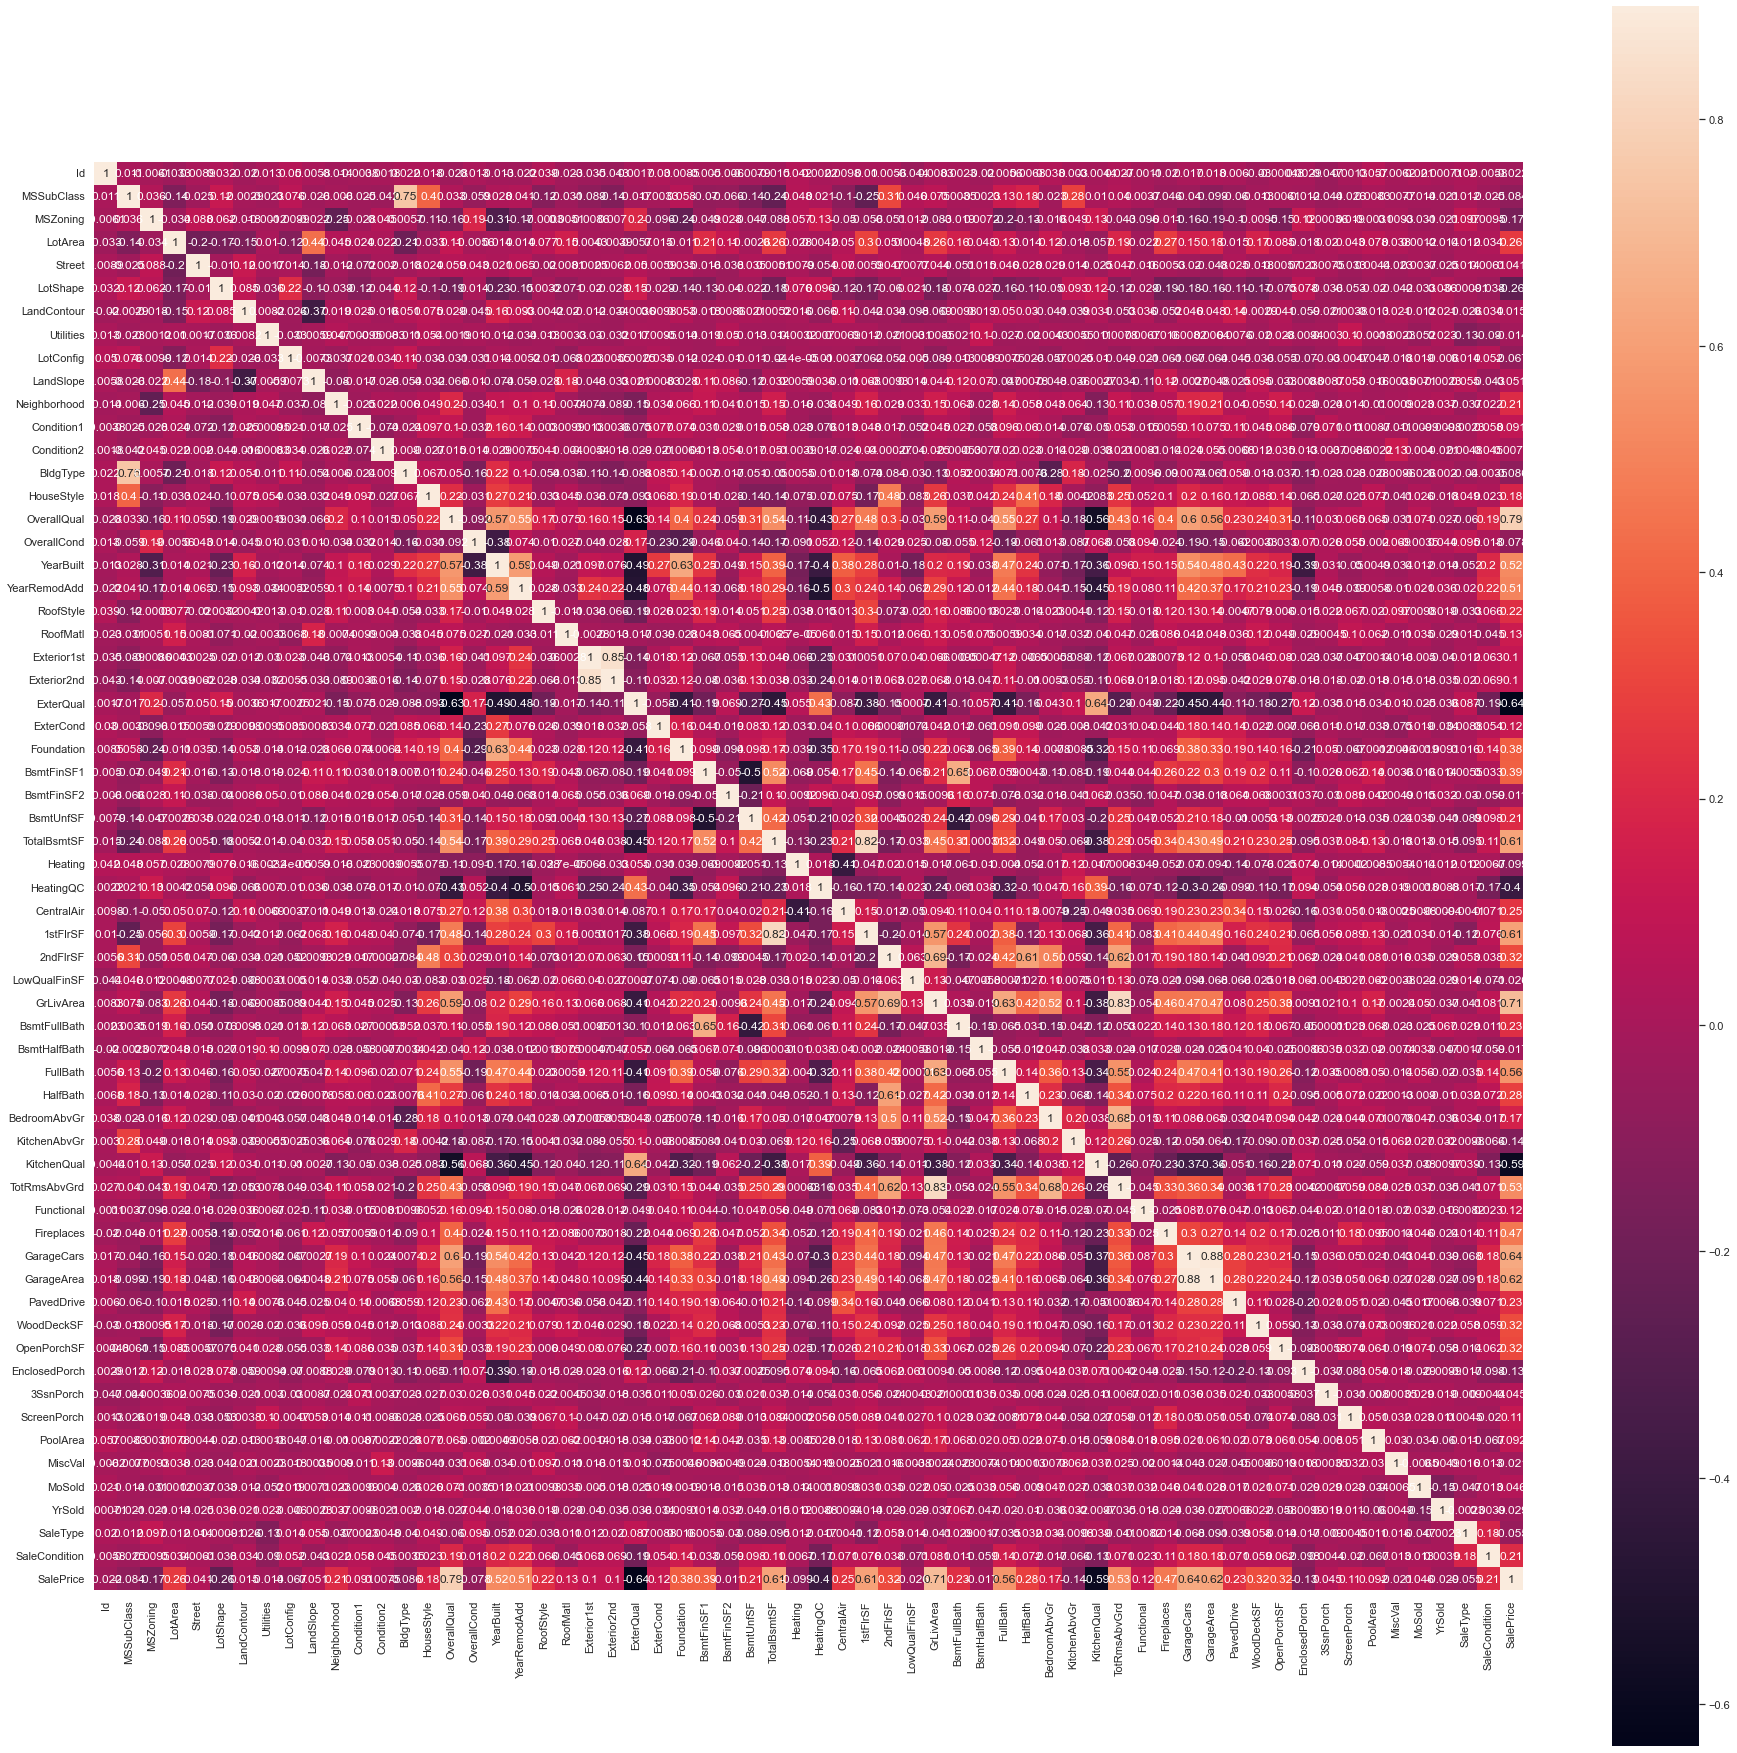

In [147]:
plt.subplots(figsize=(32,32))
sns.heatmap(train.corr(), vmax=0.9, square=True, annot=True)

In [148]:
train.corr()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.011156,-0.006096,-0.033226,0.008916,0.032122,-0.019659,0.013324,0.049756,0.005847,...,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,0.019773,-0.005806,-0.021917
MSSubClass,0.011156,1.000000,0.035900,-0.139781,-0.024969,0.119289,-0.002940,-0.022844,0.075910,-0.025672,...,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,0.012464,-0.024940,-0.084284
MSZoning,-0.006096,0.035900,1.000000,-0.034452,0.087654,0.061887,-0.017854,-0.001192,-0.009895,-0.022055,...,0.115509,0.000362,0.019089,-0.003128,0.009293,-0.031496,-0.020628,0.097437,0.009494,-0.166872
LotArea,-0.033226,-0.139781,-0.034452,1.000000,-0.197131,-0.165315,-0.149083,0.010123,-0.121161,0.436868,...,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.012292,0.034169,0.263843
Street,0.008916,-0.024969,0.087654,-0.197131,1.000000,-0.010224,0.115995,0.001682,0.013960,-0.179360,...,0.023082,0.007473,-0.033160,0.004413,-0.022733,0.003690,-0.025043,0.014339,0.006064,0.041036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,0.021172,-0.013585,-0.031496,0.001205,0.003690,-0.033455,-0.011599,-0.051552,0.018902,0.007072,...,-0.028887,0.029474,0.023217,-0.033737,-0.006495,1.000000,-0.145721,-0.047386,0.013320,0.046432
YrSold,0.000712,-0.021407,-0.020628,-0.014261,-0.025043,0.036449,0.020507,0.023353,-0.005992,-0.002305,...,-0.009916,0.018645,0.010694,-0.059689,0.004906,-0.145721,1.000000,-0.002327,0.003880,-0.028923
SaleType,0.019773,0.012464,0.097437,0.012292,0.014339,-0.000911,-0.025754,-0.126770,0.014325,0.054858,...,-0.016731,-0.009034,0.004533,0.011009,0.015773,-0.047386,-0.002327,1.000000,0.184067,-0.054911
SaleCondition,-0.005806,-0.024940,0.009494,0.034169,0.006064,-0.038118,0.033809,-0.089701,0.051579,-0.043095,...,-0.098388,0.004379,-0.020095,-0.067251,0.013027,0.013320,0.003880,0.184067,1.000000,0.213092


In [149]:
df = pd.read_csv("train.csv")
df_num = df.select_dtypes(exclude = 'object')
df_num.fillna(0, inplace=True)

/Users/liyutenaw/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


##### creating a correlation heatmap

<AxesSubplot:>

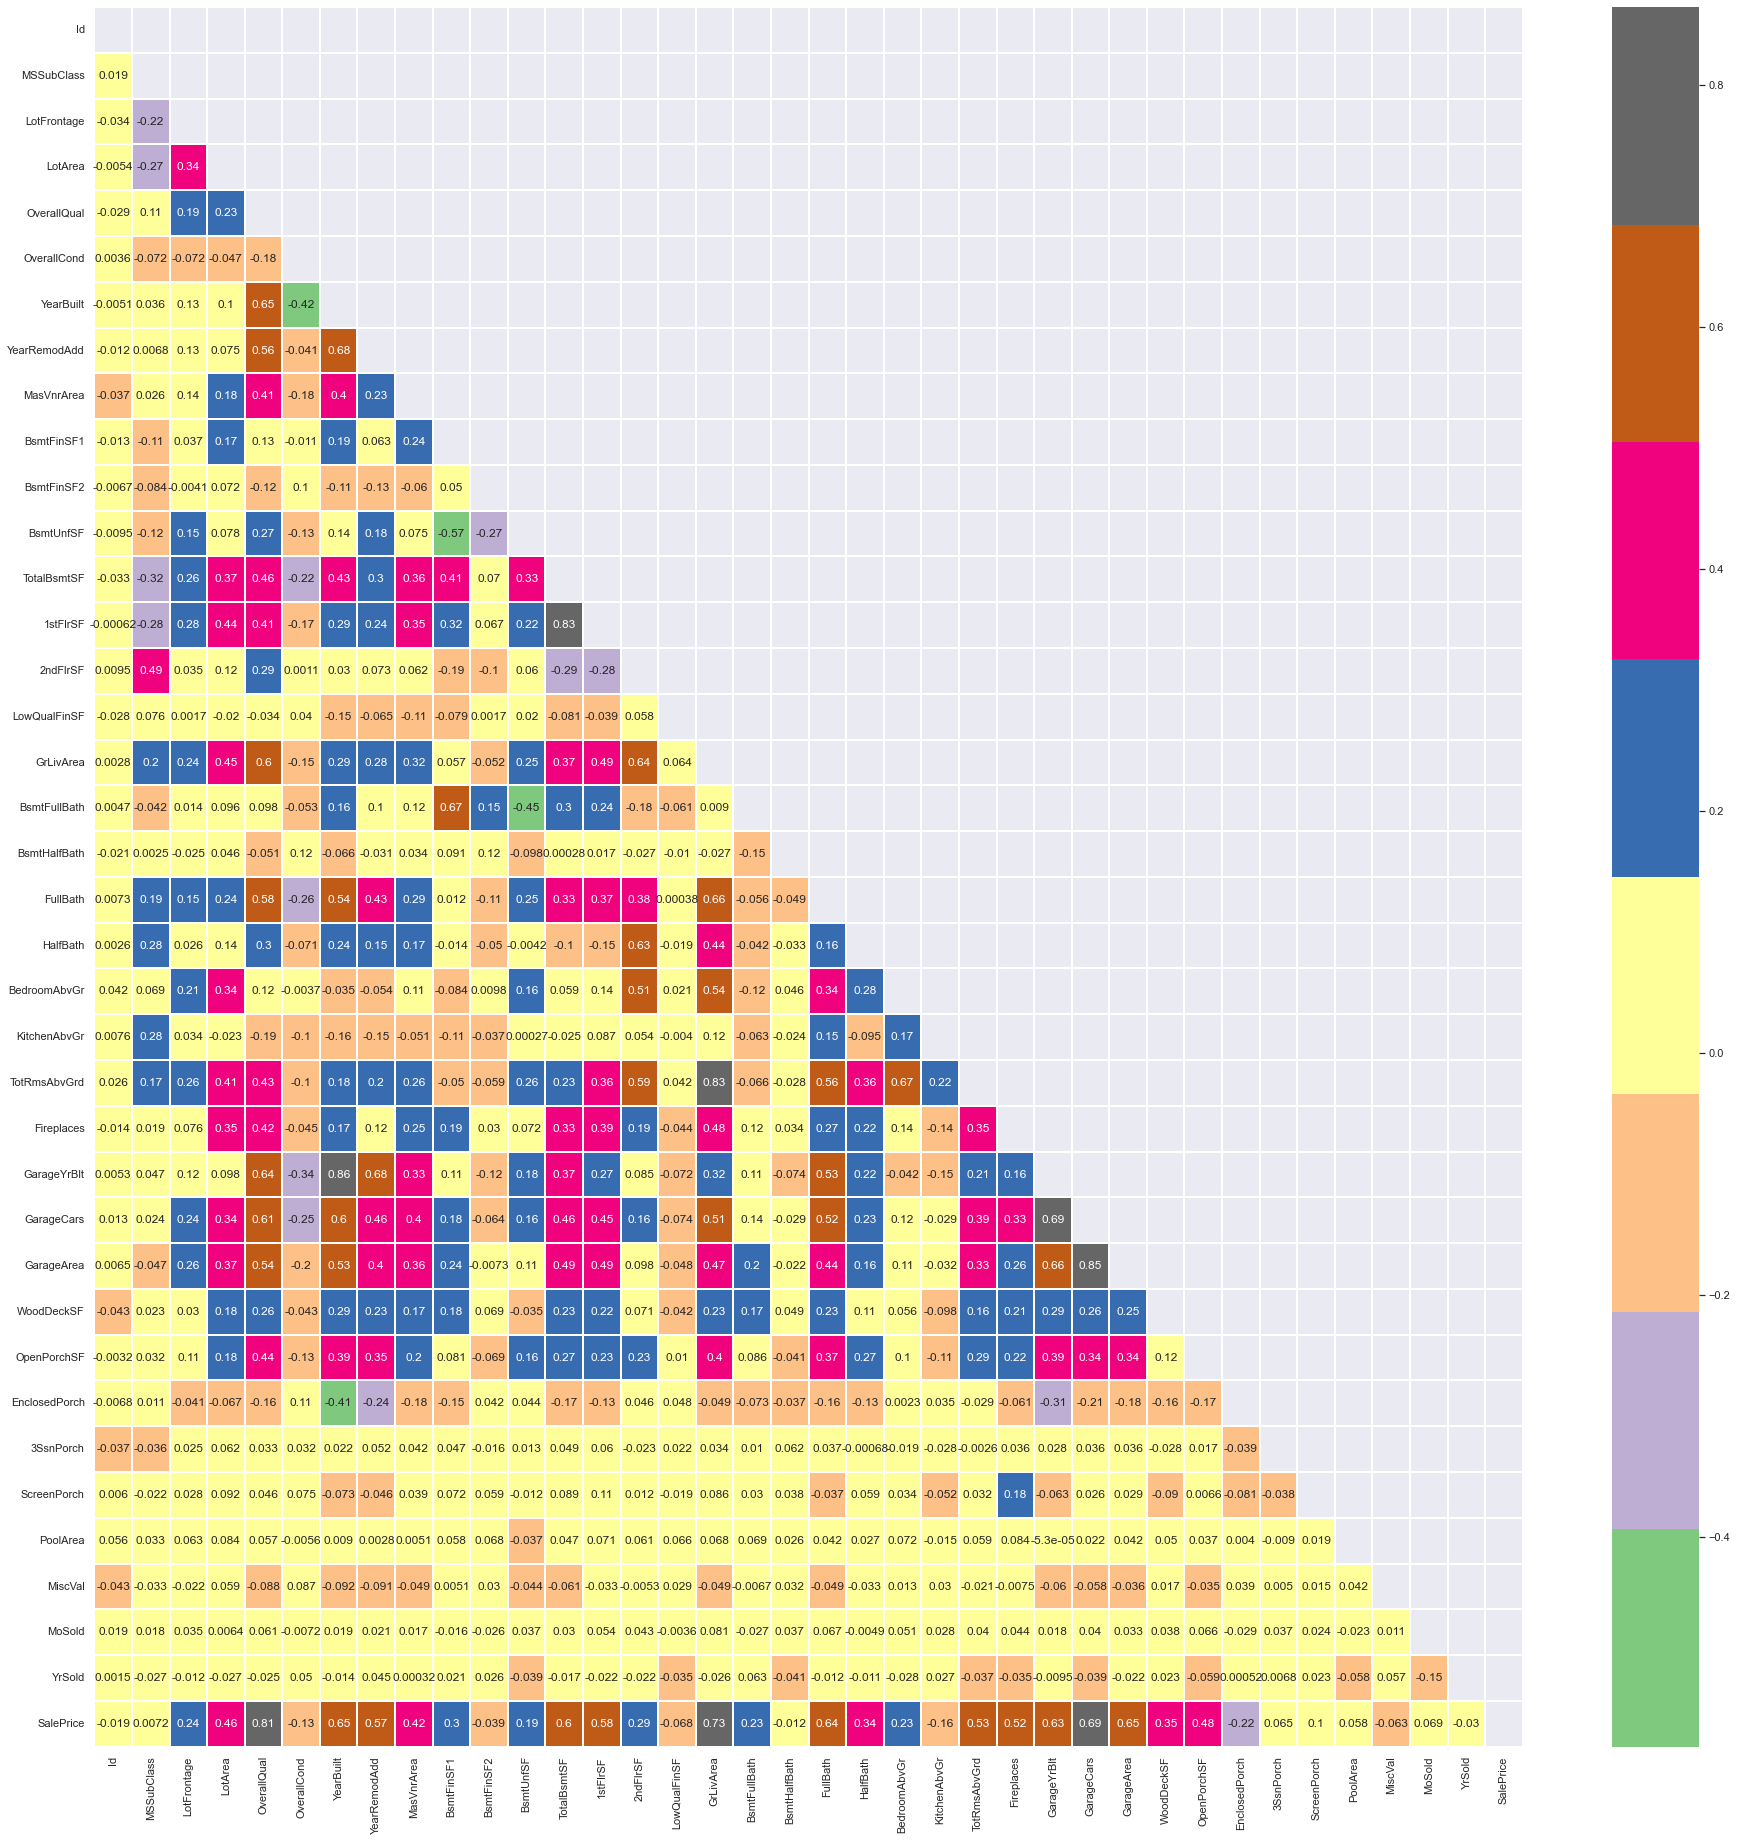

In [150]:
corrMatrix = df_num.corr(method="spearman")
mask =np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True
sns.set(rc ={'figure.figsize':(32,32)} )
sns.heatmap(corrMatrix, annot =True,linewidth = .3, cmap="Accent", mask=mask)

<AxesSubplot:>

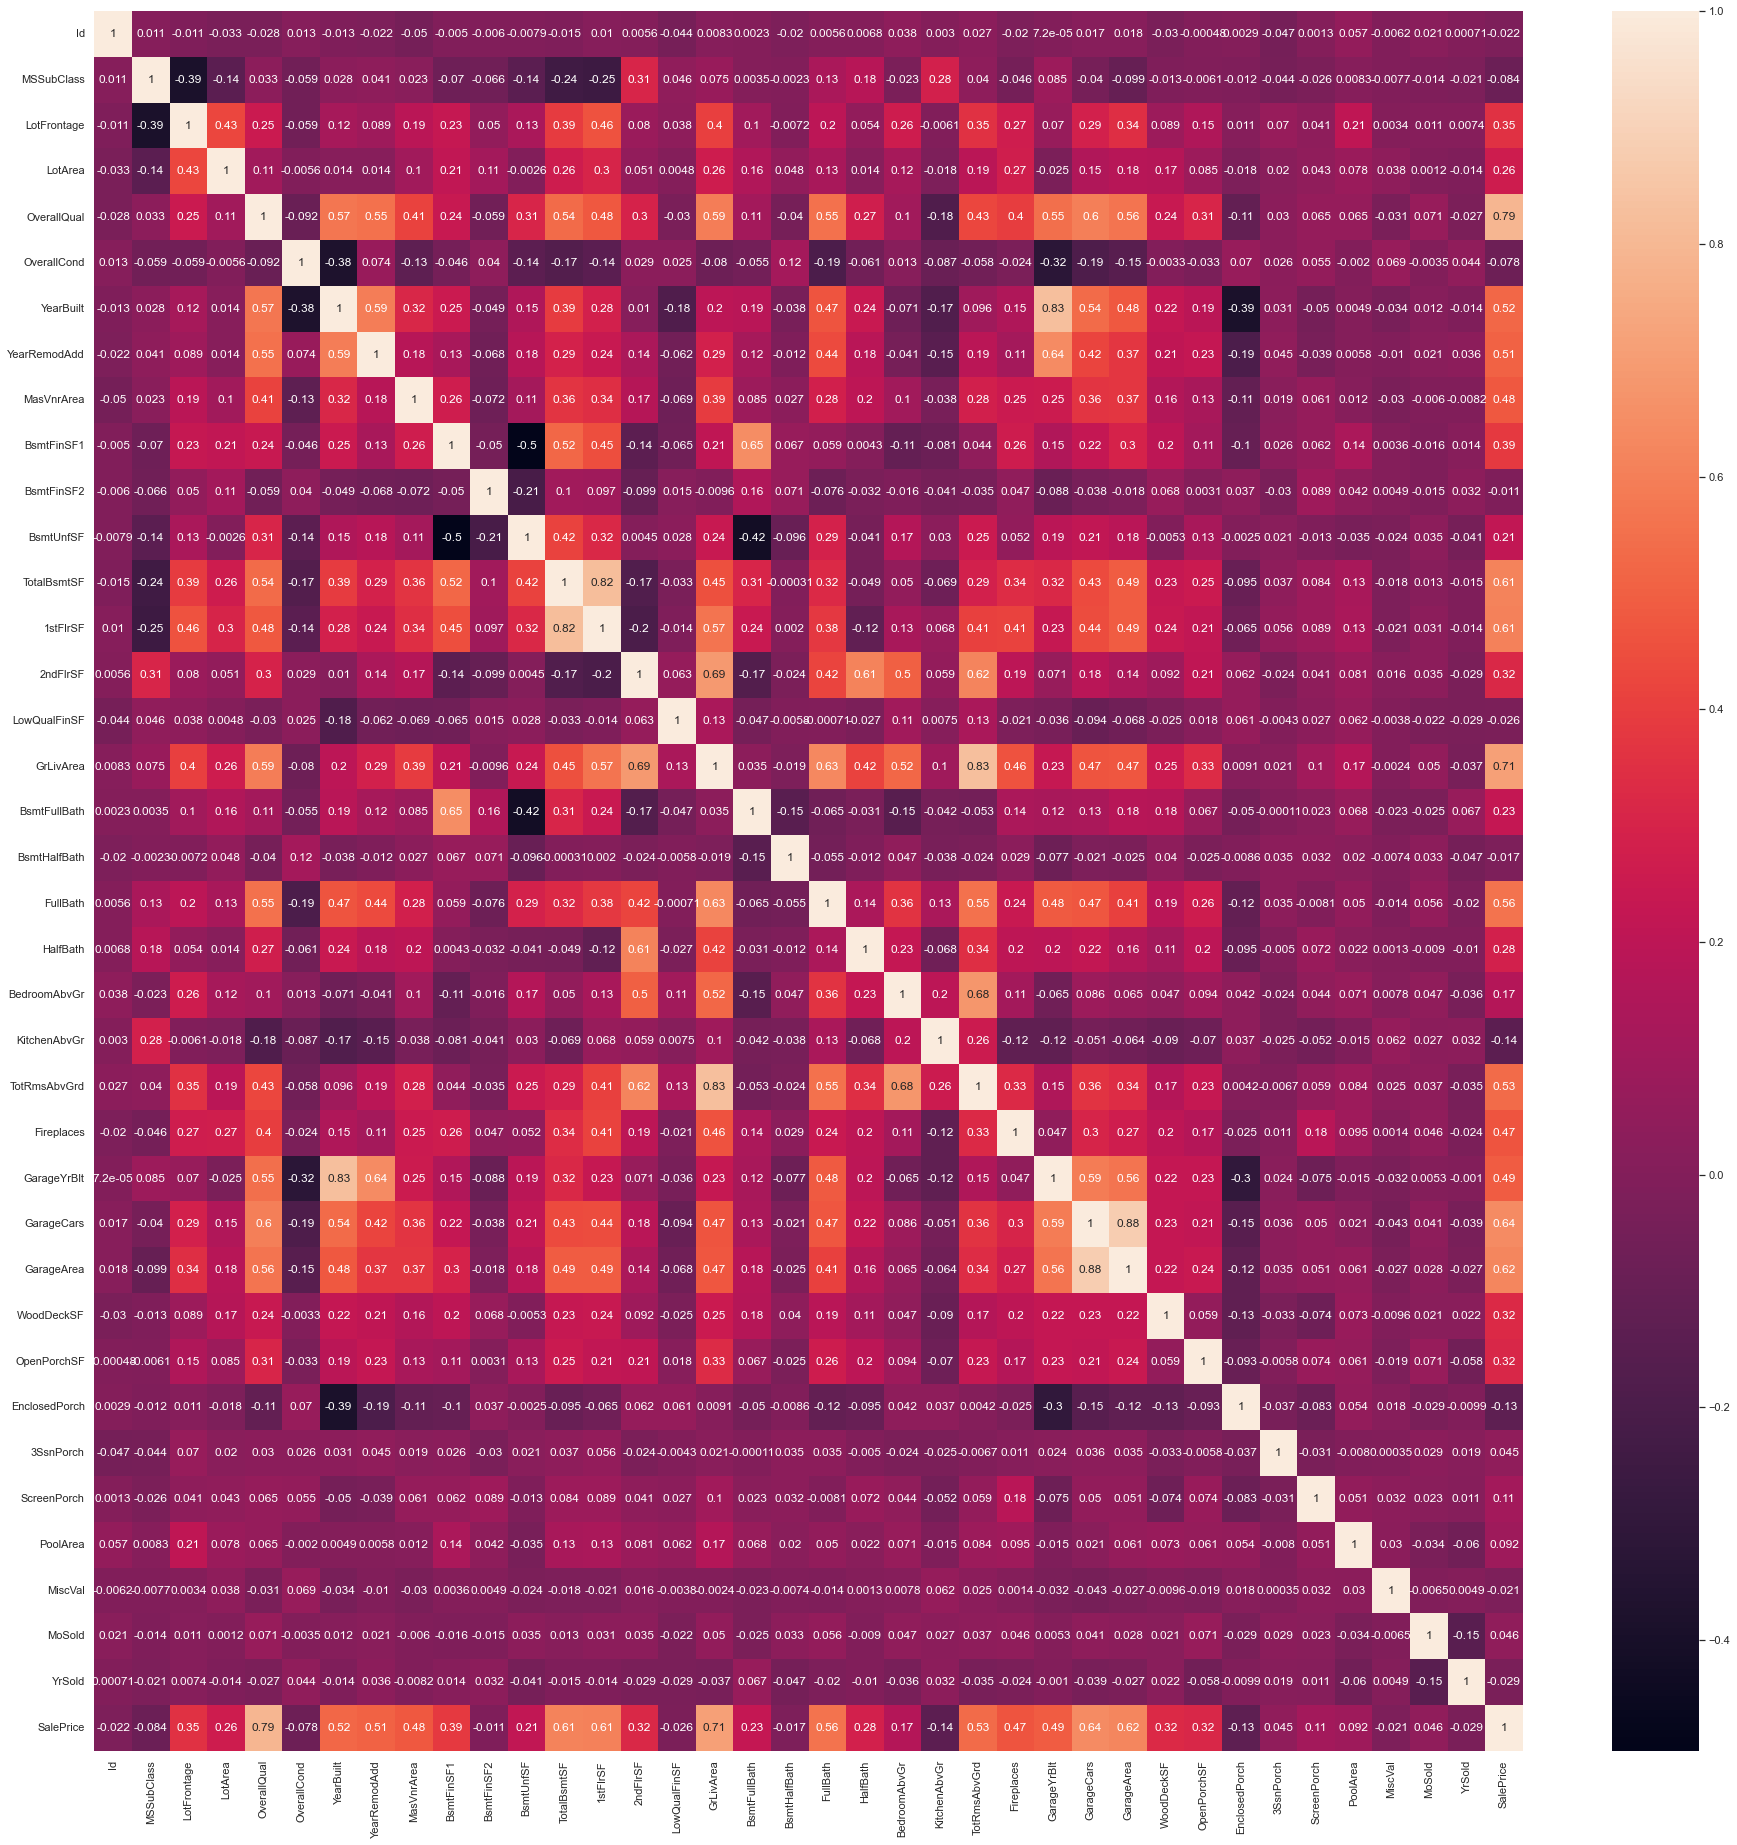

In [151]:
corr = df.corr()
sns.heatmap(corr, annot=True)

##### More Pre-Processing

In [152]:
#dropping features with clear collinearity
to_drop = ['GarageYrBlt', 'GarageCars', 'TotRmsAbvGrd', 'YearRemodAdd', 'TotalBsmtSF'] 
df_num.drop(columns = to_drop, inplace=True)

/Users/liyutenaw/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [153]:
#dropping features that are less correlated with SalePrice
drop_lessCorr = ['MSSubClass', 'OverallCond', 'KitchenAbvGr', 'EnclosedPorch'] 
df_num.drop(columns = drop_lessCorr, inplace=True)

In [154]:
#normalizing our dependent feature
df_num['SalePrice'] = np.log(df_num['SalePrice'])


/var/folders/yl/hppk9kmd65bfqd0dg2zkq88m0000gn/T/ipykernel_971/854105583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['SalePrice'] = np.log(df_num['SalePrice'])


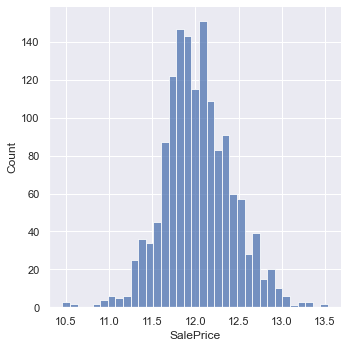

In [155]:
sns.displot(df_num['SalePrice']);

<AxesSubplot:>

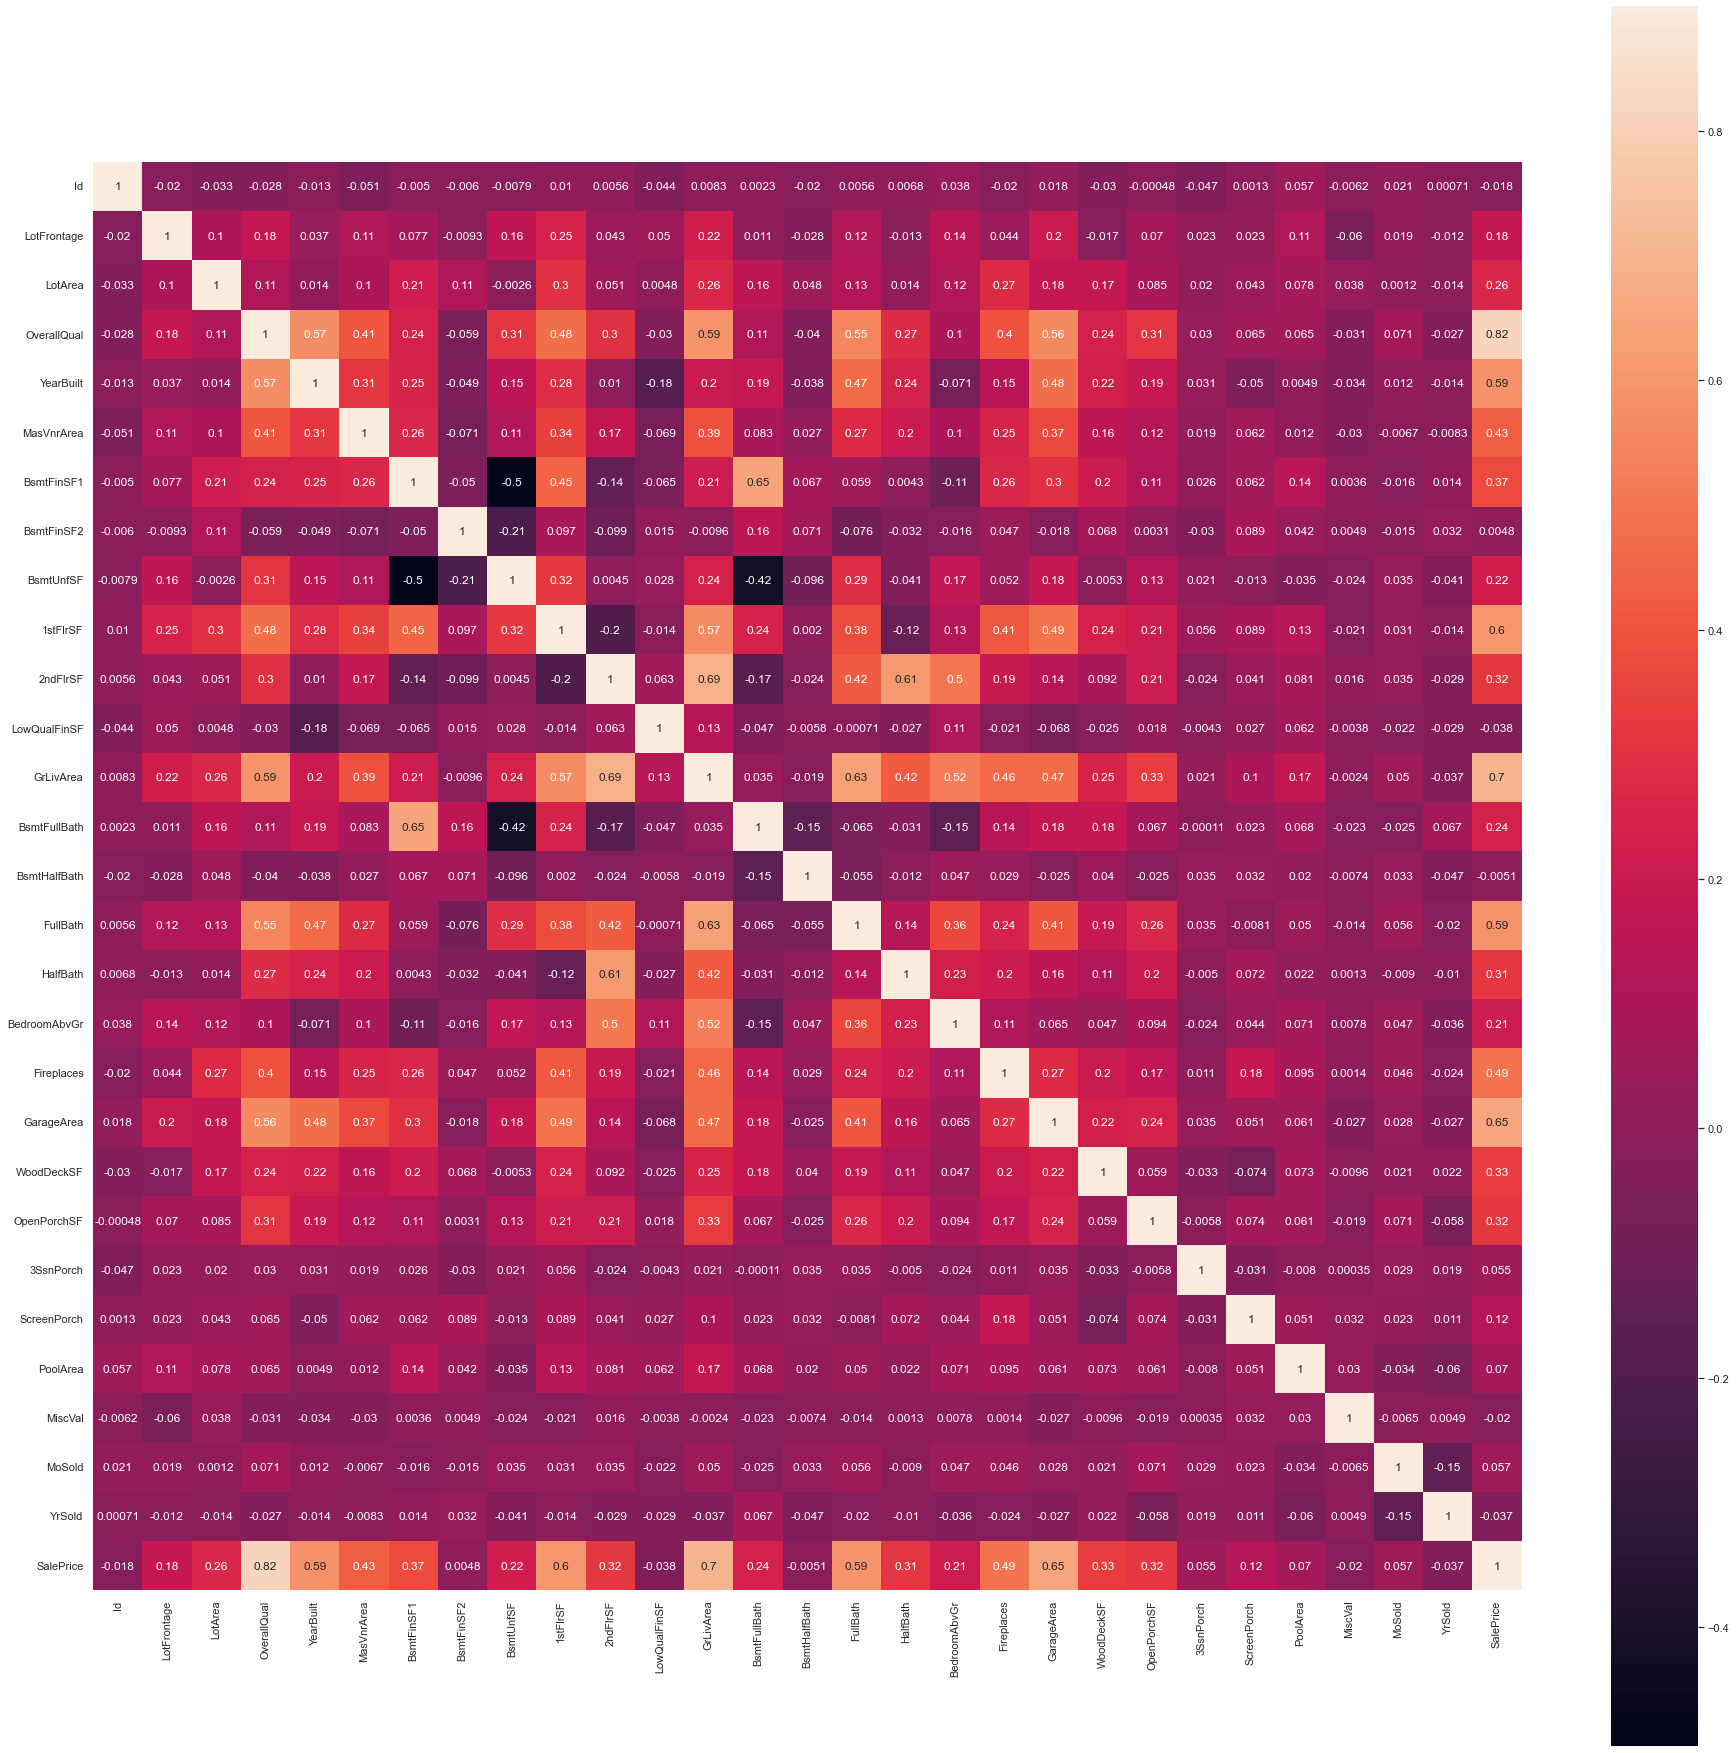

In [156]:
plt.subplots(figsize=(32,32))
sns.heatmap(df_num.corr(), vmax=0.9, square=True, annot=True)

In [157]:
from sklearn.model_selection import train_test_split

a = train.drop('SalePrice',axis = 1)
b = train.SalePrice

a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.3,random_state = 42)

In [158]:
#According to the heatmap, 'OverallQual', 'YearBuilt', '1stFlrSF', 'GrLivArea', 'FullBath', 
#'GarageArea' are the most important factors in housing price therefore we will experiment with them

a1_train = a_train[['OverallQual', 'YearBuilt', '1stFlrSF', 'GrLivArea', 'FullBath', 'GarageArea']]
a1_test = a_test[['OverallQual', 'YearBuilt', '1stFlrSF', 'GrLivArea', 'FullBath', 'GarageArea']]

b1_train = b_train

b1_test = b_test


In [159]:
regr4 = LinearRegression()
regr4.fit(a1_train, b1_train)

LinearRegression()

In [160]:
coff = regr4.score(a1_train, b1_train)
print('Coefficient of Determination for Experiment 1:', coff)

Coefficient of Determination for Experiment 1: 0.7478502257060993


In [161]:
 b_pred = regr4.predict(a1_test)

### Experiment 2 Evaluation

In [162]:
##Evaluate Model
from sklearn import metrics
print('Coefficient of Determination: {:.2f}'.format(coff*100))

mae = metrics.mean_absolute_error(b1_test, b_pred)
print('Mean Absolute Error:', mae)

mse = metrics.mean_squared_error(b1_test, b_pred)
print('Mean Square Error:', mse)

rmse = metrics.mean_squared_error(b1_test, b_pred,squared = False)
print('Root Mean Square Error:', rmse)


Coefficient of Determination: 74.79
Mean Absolute Error: 24530.014798950764
Mean Square Error: 1419162788.6496198
Root Mean Square Error: 37671.777083774796


In [163]:
print(f'intercept/constant = {regr4.intercept_}')

intercept/constant = -892395.5717300111


# Experiment 3

In [164]:
# For experiment 3, I will use the experiment 1 feature to test different models

In [165]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

In [166]:
#feature selection algorithm can pick better features
fsa = SelectKBest(score_func=f_regression, k='all')
fsa.fit(X3_train, y3_train)
X_train_fsa = fsa.transform(X3_train)
X_test_fsa = fsa.transform(X3_test)

In [167]:
#try random forest regressor
from sklearn.ensemble import RandomForestRegressor

In [168]:
randomfm = RandomForestRegressor(n_estimators = 1000, random_state = 42).fit(X_train_fsa, y3_train)

y2_pred = randomfm.predict(X_test_fsa)

##### Random Forest Regressor

In [169]:
##Evaluate Model
from sklearn import metrics
coff = randomfm.score(X_train_fsa, y3_train)
print('Coefficient of Determination: {:.2f}'.format(coff*100))

mae = metrics.mean_absolute_error(y3_test, y2_pred)
print('Mean Absolute Error:', mae)

mse = metrics.mean_squared_error(y3_test, y2_pred)
print('Mean Square Error:', mse)

rmse = metrics.mean_squared_error(y3_test, y2_pred,squared = False)
print('Root Mean Square Error:', rmse)


Coefficient of Determination: 97.56
Mean Absolute Error: 17199.84328938356
Mean Square Error: 835805327.3642344
Root Mean Square Error: 28910.297946652754


##### Lasso Regression

In [170]:
from sklearn.linear_model import Lasso

In [171]:
lassomodel = Lasso().fit(X_train_fsa,y3_train)
y2_pred1 = lassomodel.predict(X_test_fsa)

In [172]:
##Evaluate Model

from sklearn import metrics
coffl = lassomodel.score(X_train_fsa, y3_train)
print('Coefficient of Determination: {:.2f}'.format(coffl*100))

mae = metrics.mean_absolute_error(y3_test, y2_pred1)
print('Mean Absolute Error:', mae)

mse = metrics.mean_squared_error(y3_test, y2_pred1)
print('Mean Square Error:', mse)

rmse = metrics.mean_squared_error(y3_test, y2_pred1,squared = False)
print('Root Mean Square Error:', rmse)

Coefficient of Determination: 83.72
Mean Absolute Error: 23239.179452545464
Mean Square Error: 1421606468.12583
Root Mean Square Error: 37704.19695638445


# Experiment 2 redo

<AxesSubplot:>

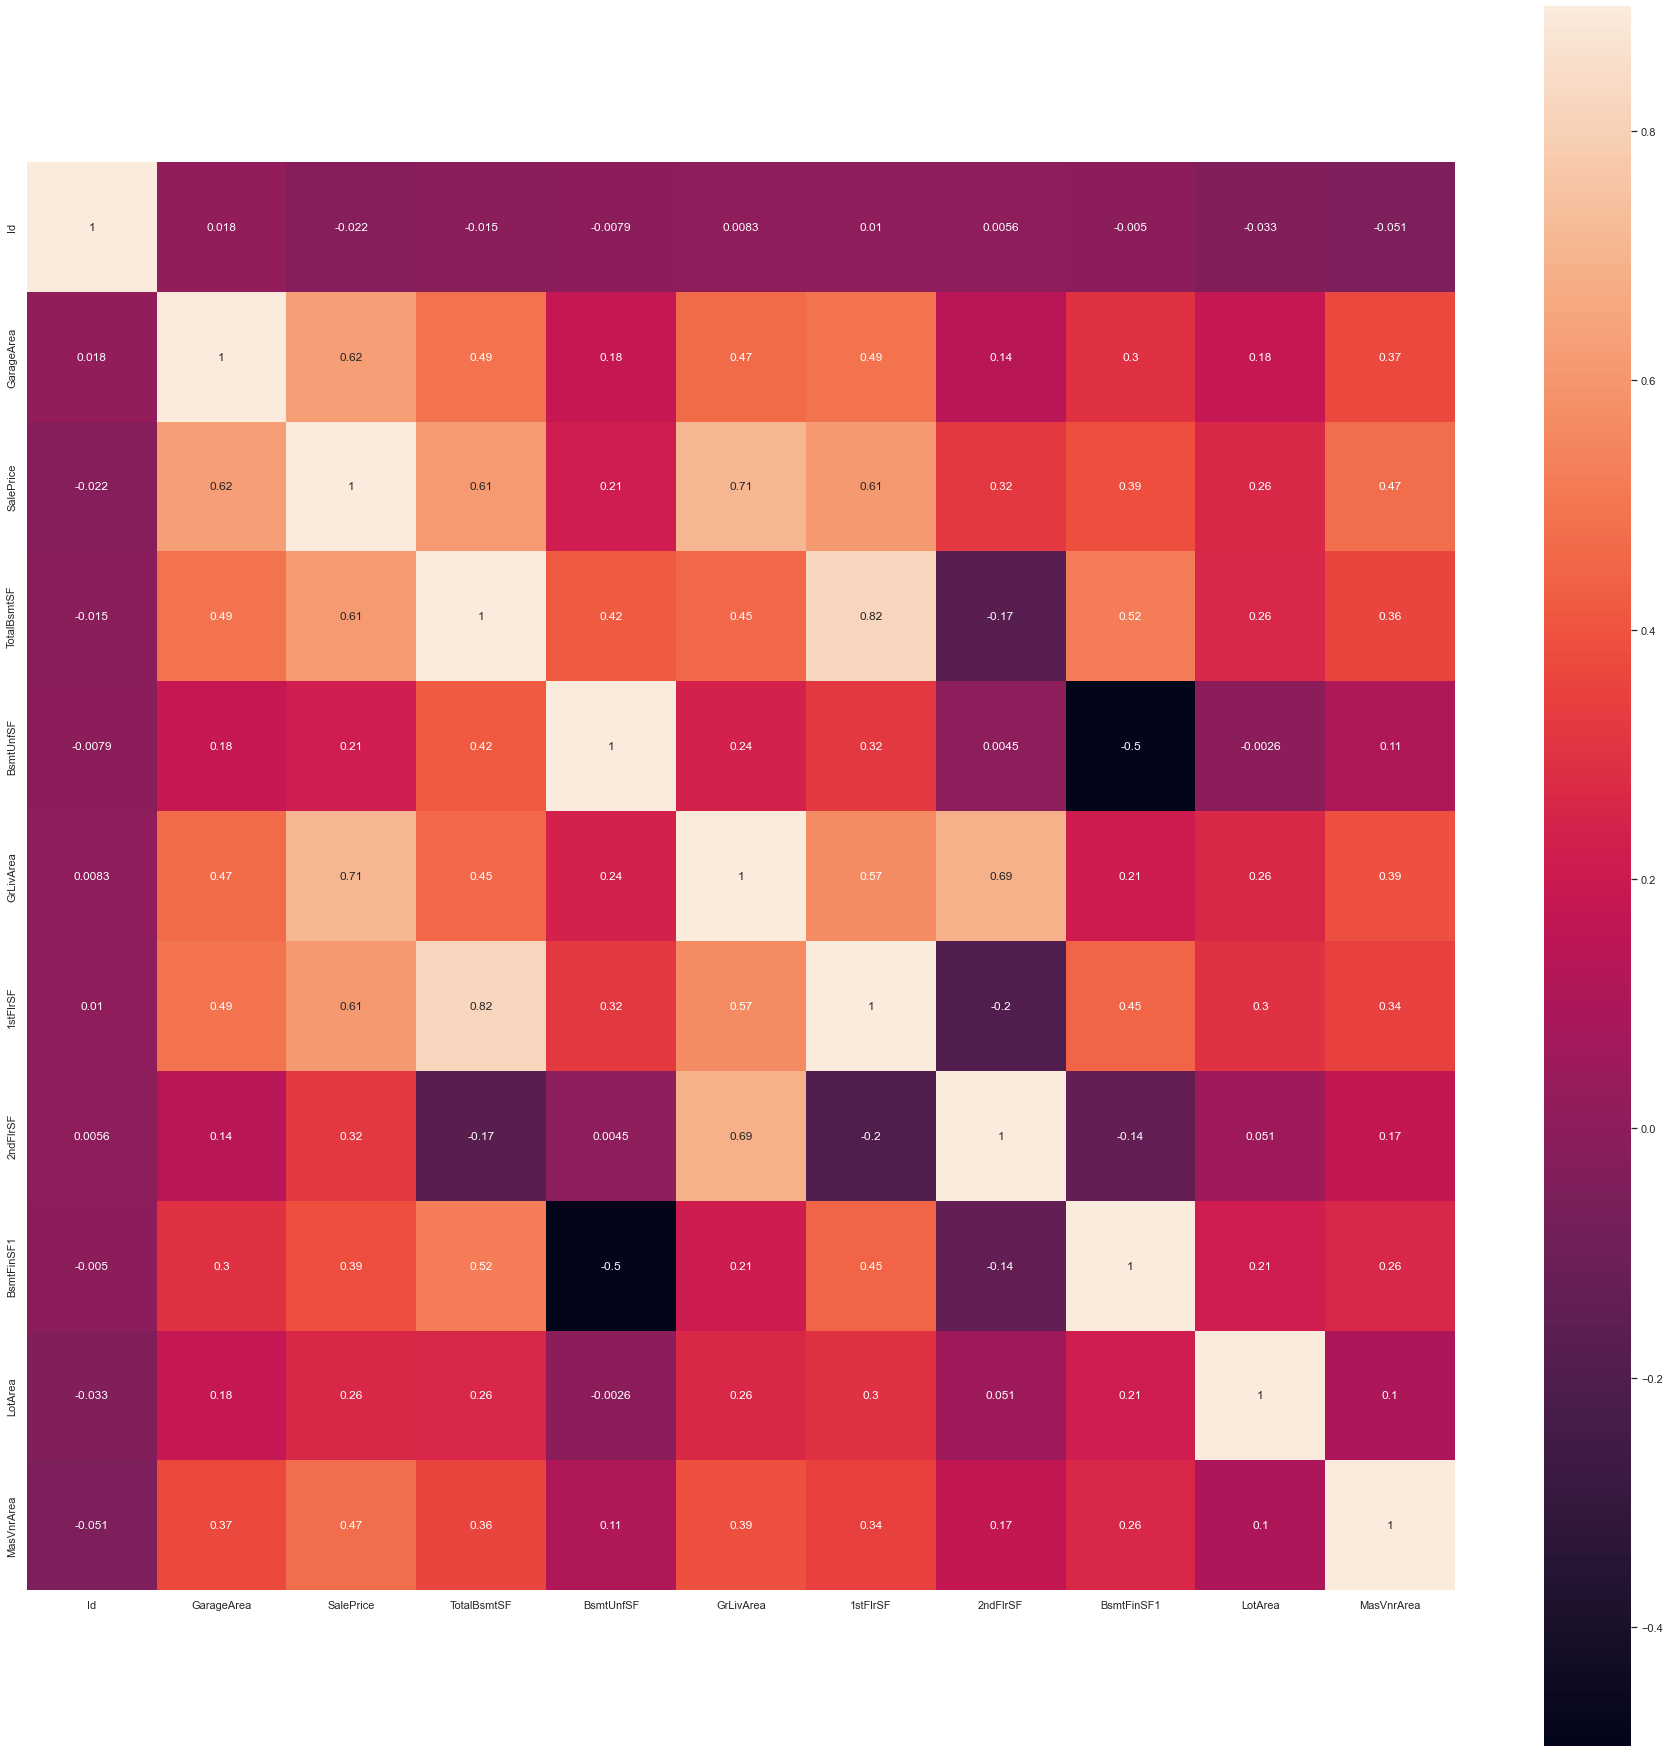

In [173]:
plt.subplots(figsize=(32,32))
sns.heatmap(continuous.corr(), vmax=0.9, square=True, annot=True)

In [174]:
from sklearn.model_selection import train_test_split

c = train.drop('SalePrice',axis = 1)
d = train.SalePrice

c_train, c_test, d_train, d_test = train_test_split(c, d, test_size=0.3,random_state = 42)

In [175]:
#Remove high collinearity features

In [176]:
#According to the heatmap, we will use the most important factors in housing price 
c1_train = c_train[['TotalBsmtSF', 'GrLivArea', '1stFlrSF', 'GarageArea']]
c1_test = c_test[['TotalBsmtSF', 'GrLivArea', '1stFlrSF', 'GarageArea']]

d1_train = d_train

d1_test = d_test


In [177]:
regr5 = LinearRegression()
regr5.fit(c1_train, d1_train)

LinearRegression()

## Evaluate Model experiment 2 redo

In [178]:
d_pred = regr5.predict(c1_test)
from sklearn import metrics
coff = regr5.score(c1_train, d1_train)
print('Coefficient of Determination: {:.2f}'.format(coff*100))


Coefficient of Determination: 62.79
